# INTRODUCTION

The Titanic dataset contains information about 891 passengers who were on board the RMS Titanic, a British passenger ship that sank in the North Atlantic Ocean after colliding with an iceberg on April 15, 1912.The Titanic dataset is a key resource in data analyis. It provides serious details about passengers, such as survival status, Passenger class, names, gender, age,cabin,parch, fare, and embarkation ports. It's a great way to start learning data analysis techniques by exploring patterns and building predictive models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We read our CSV file through 'pandas' and create 'df1' so as not to touch our main dataset.

In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/Titanic.csv')
df1=df.copy()
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We delete the columns 'SibSp', 'Parch', 'Ticket', 'Cabin' and write 'inplace=True' to save them, as they do not affect the analysis we will do in our dataset.

In [3]:
df1.drop(['SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C


We determine in which columns our empty values are.

In [4]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
Embarked         2
dtype: int64

In order to manage and analyze the data more effectively, we replace the unknown ages with average ages.

In [5]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)
df1['Age']=df1['Age'].round(1)
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S


We create a new column called 'Age.group' and fix it because the age values we averaged are 'NaN' in 'Age.group'

In [6]:
ages = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
groups = ['0-10','10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df1['Age.group'] = pd.cut(df1['Age'], bins=ages, labels=groups, right=False).astype(str).replace('nan', np.nan)
df1.head(5)
                          

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age.group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,30-40


We change the names of the values in our 'Survived' , 'Pclass' , 'Embarked' columns with the 'map' function.

In [7]:
df1['Survived']=df['Survived'].map({0:'Dead',1:'Alive'})
df1['Pclass']=df1['Pclass'].map({1:'First Class',2:'Business Class',3:'Economy Class'})
df1['Embarked']=df['Embarked'].map({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age.group
0,1,Dead,Economy Class,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton,20-30
1,2,Alive,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg,30-40
2,3,Alive,Economy Class,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton,20-30
3,4,Alive,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton,30-40
4,5,Dead,Economy Class,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton,30-40


We round up the numbers in our 'Fare' column and put a "$" sign in front of it with a 'lambda'.

In [8]:
df1['Fare'] = df1['Fare'].round(1)
df1['Fare'] = df1['Fare'].apply(lambda x: '{:.2f}$'.format(x))
df1.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age.group
0,1,Dead,Economy Class,"Braund, Mr. Owen Harris",male,22.0,7.20$,Southampton,20-30
1,2,Alive,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.30$,Cherbourg,30-40
2,3,Alive,Economy Class,"Heikkinen, Miss. Laina",female,26.0,7.90$,Southampton,20-30
3,4,Alive,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.10$,Southampton,30-40
4,5,Dead,Economy Class,"Allen, Mr. William Henry",male,35.0,8.00$,Southampton,30-40


We import our new dataset to 'excel'.

In [9]:
# df1.to_excel('Titanic project.xlsx', index=False)

# Survival and Death count by Passenger Class

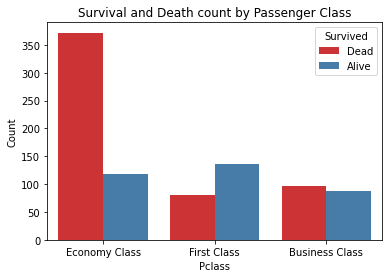

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df1, palette='Set1')
plt.title('Survival and Death count by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Age Group Distribution

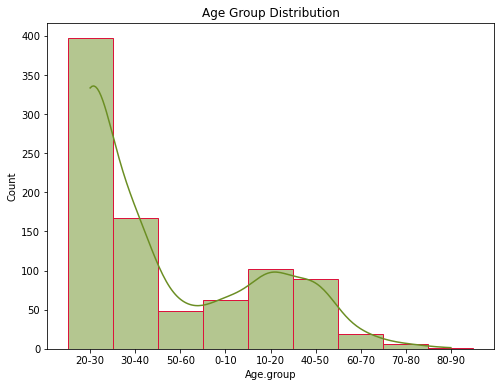

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['Age.group'], bins=20, kde=True, color='olivedrab', edgecolor='crimson')
plt.title('Age Group Distribution')
plt.show()


# Age Distribution

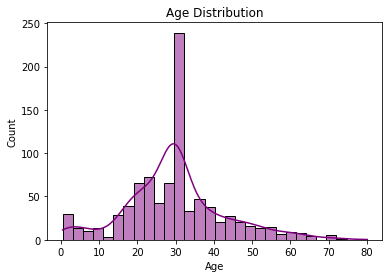

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df1['Age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution')
plt.show()

# Survival and Death counts by Gender.

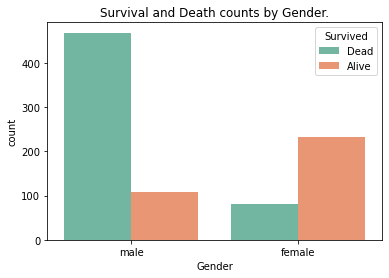

In [13]:
plt.figure(figsize=(6, 4))
sns.set_palette('Set2')
sns.countplot(x='Sex', hue='Survived', data=df1)
plt.xlabel('Gender')
plt.title('Survival and Death counts by Gender.')
plt.show()

# Survival and Death counts by Age Group.

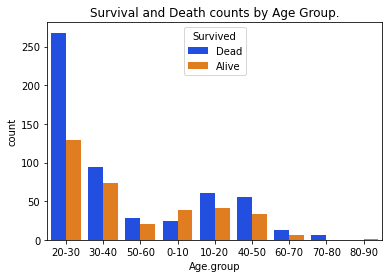

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Age.group', hue='Survived', data=df1,palette='bright')
plt.title('Survival and Death counts by Age Group.')
plt.show()

# Survival and Death Ratio

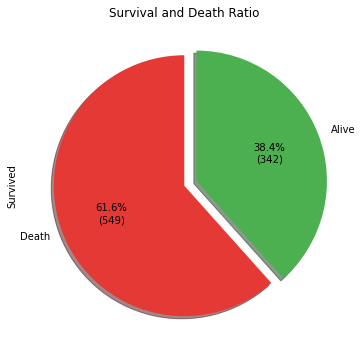

In [21]:
colors = ['#E53935', '#4CAF50']
explode = (0, 0.1)
plt.figure(figsize=(8, 6))
df1['Survived'].value_counts().plot.pie(
    autopct=lambda p: '{:.1f}%\n({:d})'.format(p, int(round(p * len(df1) / 100))),
    startangle=90,
    colors=colors,
    labels=['Death', 'Alive'],  
    shadow=True,
    explode=explode
)

plt.title('Survival and Death Ratio')
plt.show()


# Conclusion

Following the comprehensive analysis of the Titanic dataset, it becomes apparent that a higher mortality rate among males played a significant role in the tragic events. The data underscores that more male passengers perished compared to their female counterparts.

Digging deeper into the socio-economic aspects, it is notable that the Economy Class suffered the highest number of casualties. This can be attributed to the challenging conditions faced by passengers in the lower-class cabins during the disaster. The prioritization of evacuation resources, limited accessibility, and potentially delayed response in the Economy Class might have contributed to the higher mortality rate in this category.

Additionally, the concentration of casualties within the 20-30 age group suggests the vulnerability of this demographic during the Titanic incident. Younger passengers in this age range, often more physically able but potentially lacking the priority given to children and the elderly, faced higher risks.

The overall mortality rate of 61.6% underscores the severity of the disaster, leaving 38.4% of passengers as survivors. This stark contrast emphasizes the life-threatening nature of the circumstances faced by those on board.

In summary, the analysis reveals a complex interplay of gender dynamics, socio-economic factors, and age-related vulnerabilities contributing to the varying mortality rates among Titanic passengers. The higher mortality rate among males and in the Economy Class paints a poignant picture of the challenges faced by certain passenger groups during this historic tragedy.
